Loss of train: [205.5514254492181, 144.69835682788022, 106.30751443316822, 82.08106387957325, 66.786483832437526, 57.124211734257322, 51.013589999048939, 47.142589523315451, 44.683869246686513, 43.115725962870691, 42.109187088226015, 41.456812623196662, 41.027798556130129, 40.73966570146839, 40.540407136915107, 40.39723071026539, 40.289460310258477, 40.204059591739515, 40.132809375302607, 40.070527820854828, 40.013948149747669, 39.961010998526476, 39.910418225365078, 39.861351577870934, 39.813295314256351, 39.765924371155648, 39.719033860231079, 39.672494622873344, 39.626225214133726, 39.580174244576369, 39.534309251985619, 39.488609689343818, 39.443062507382386, 39.397659372365254, 39.352394914334525, 39.307265624600738, 39.262269162199438, 39.217403917888554, 39.17266874027036, 39.128062763928583, 39.083585301719559, 39.039235777380675, 38.995013683452406, 38.95091855507588, 38.906949953732223, 38.863107457196641, 38.819390653367961, 38.775799136507473, 38.732332504969932, 38.6889903

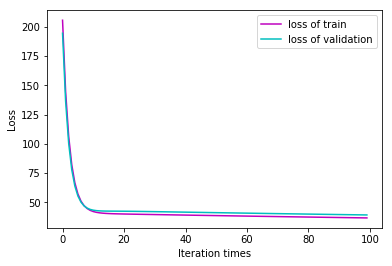

In [12]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

eta = 0.001 # Learning Rate
iter = 100 # Iteration times
accuracy = 0.001 # If loss<accuracy , then stop iteration

m = 506 # Amount of data
m_train = 203 # Amount of training data
m_test = 203 # Amount of testing data
features=13 # Fearures of dataset

#Initialize arrays
theta=[0]*(features+1) #All zero initialization
#used to stastic and draw graph
iter_num = [0]*iter;
loss_train  =[0]*iter;
loss_test  = [0]*iter;


#Use to get dataset from file
def get_data():
    data = load_svmlight_file("dataset\\housing_scale",n_features=features)
    return data[0], data[1]

#Use to split dataset and return 
def split_data():
    X, y = get_data()
    X = X.toarray()
    return train_test_split( X, y, test_size=0.5, random_state=43)

#The linear model
def hypothesis(x):
    result = theta[0]
    for i in range (0,features):
        result = result + theta[i+1] * x[i]
    return result

#Loss function 
def loss(m,X,y):
    sum=0
    for i in range(0,m):
        sum = sum + ( hypothesis(X[i]) - y[i] ) **2
    sum = sum / (2*m)
    return sum

#Derivative the Loss function to get Gradient of  theta j
def derivative(j,m,X,y):
    sum=0
    if(j==0):
         for i in range(0,m):
            sum = sum + ( hypothesis(X[i]) - y[i] ) 
    else:
        for i in range(0,m):
            sum = sum + ( hypothesis(X[i]) - y[i] ) *  X[i][j-1]
        sum = sum / m        
    return sum

#Train and validate 
def trainAndTest():
    for i in range(0,iter):
        for j in range(0,features+1):
            #Using gradient descent to minimum the Loss Function, eta is the step length
            #Derivative(j) calculates the gradient on theta j
            theta[j] = theta[j] - eta * derivative(j,m_train,X_train,y_train)
            
        iter_num[i] = i;
        loss_train[i] = loss(m_train,X_train,y_train);
        loss_test[i] = loss(m_test,X_test,y_test);
        
            
def information():
    print("Loss of train:", loss_train)
    print("Loss of valitation",loss_test)


#Main 
X_train, X_test, y_train, y_test = split_data()

trainAndTest()

#Print the information and draw graphs
information()
fig, ax = plt.subplots()
ax.plot(iter_num, loss_train,color = 'm', label='loss of train')
ax.plot(iter_num, loss_test, color = 'c', label='loss of validation')
plt.legend(bbox_to_anchor=[1, 1])  
ax.set_xlabel('Iteration times')
ax.set_ylabel('Loss')
plt.show()
